In [2]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt


In [4]:
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)

Loading MNIST dataset...


In [6]:
mask = (y == 0) | (y == 1)
X, y = X[mask], y[mask]
print(f"Dataset filtered: {X.shape[0]} samples (only digits 0 and 1)")

Dataset filtered: 14780 samples (only digits 0 and 1)


In [7]:
X_train, X_test = X[:12000], X[12000:]
y_train, y_test = y[:12000], y[12000:]

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
print("Training Logistic Regression model...")
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)


Training Logistic Regression model...


LogisticRegression(max_iter=1000)

In [10]:
y_pred = log_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n✅ Test Accuracy: {acc * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



✅ Test Accuracy: 99.96%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1297
           1       1.00      1.00      1.00      1483

    accuracy                           1.00      2780
   macro avg       1.00      1.00      1.00      2780
weighted avg       1.00      1.00      1.00      2780

Confusion Matrix:
[[1296    1]
 [   0 1483]]


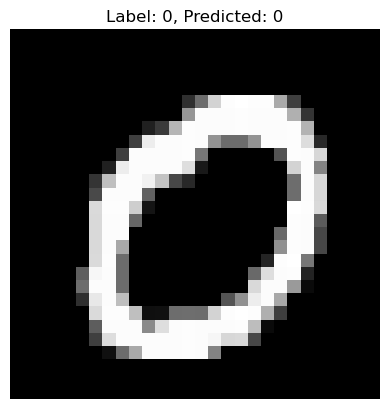

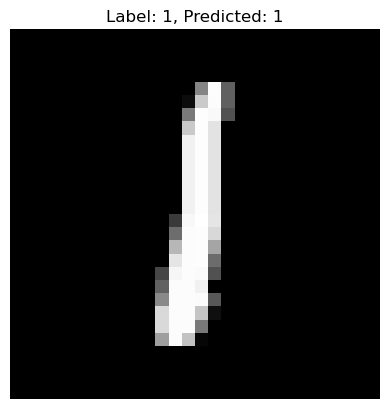

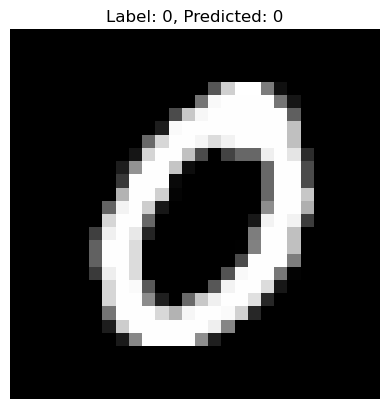

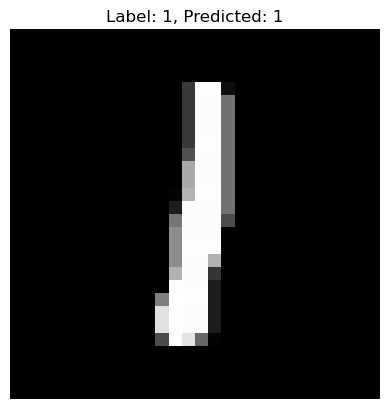

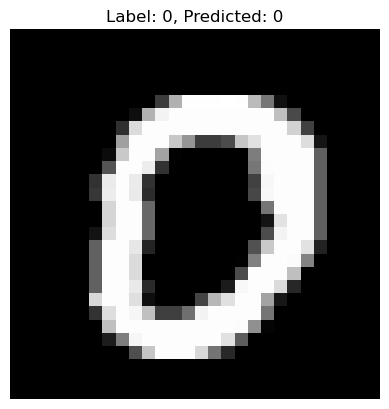

In [11]:
for i in range(5):
    img = X_test[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {y_test[i]}, Predicted: {y_pred[i]}")
    plt.axis("off")
    plt.show()